In [63]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import plot_line_chart, HEIGHT,ts_aggregation_by, series_train_test_split, plot_forecasting_eval, plot_forecasting_series

In [64]:
file_tag = "forecast_covid"
filename = "datasets/forecast_covid_single.csv"
index = "date"
target = "deaths"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

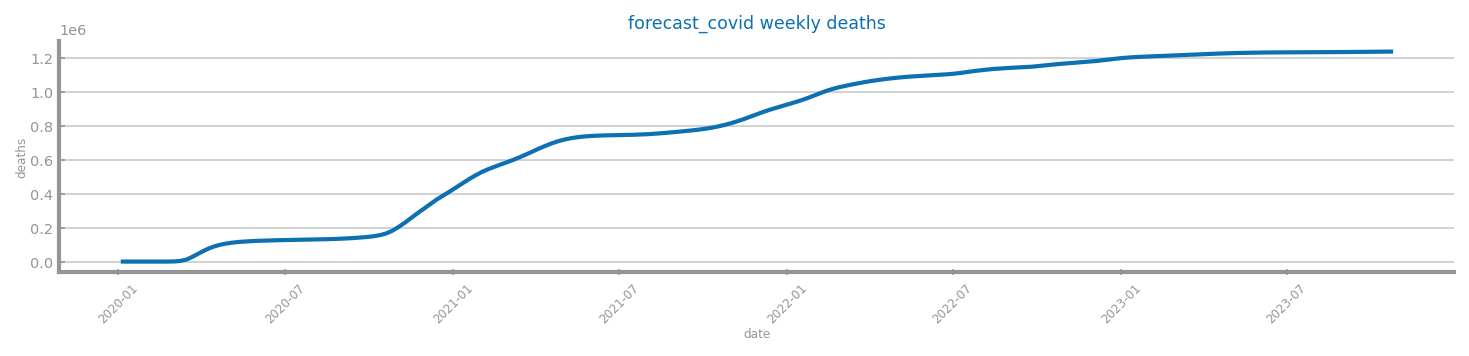

In [65]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

#dont uncomment this, its just an example of the savefig, since the teacher doesn't save the pics this time
#savefig(f"images/forecast/{file_tag}_data_transformation_aggregation_<whatever-you-doing-in-this-step>", bbox_inches="tight")
show()

# Aggregation

In [66]:
ss_agg_w: DataFrame = ts_aggregation_by(data, gran_level="W", agg_func="sum")
ss_agg_m: DataFrame = ts_aggregation_by(data, gran_level="M", agg_func="sum")
ss_agg_q: DataFrame = ts_aggregation_by(data, gran_level="Q", agg_func="sum")
datas = [ss_agg_w,ss_agg_m,ss_agg_q]
names = ["week","month","quarter"]

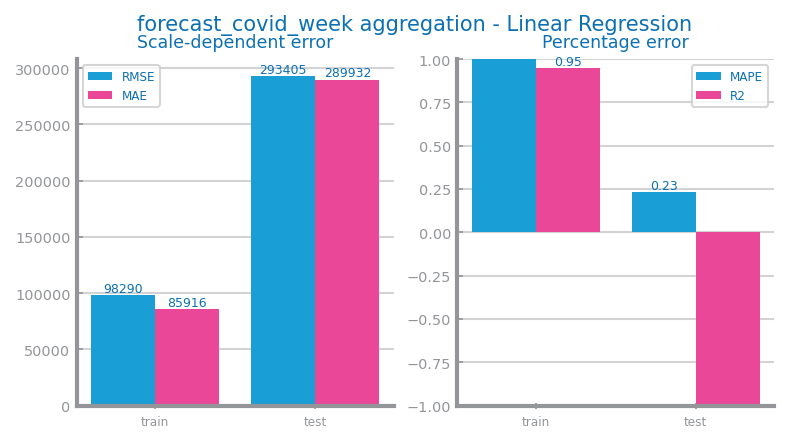

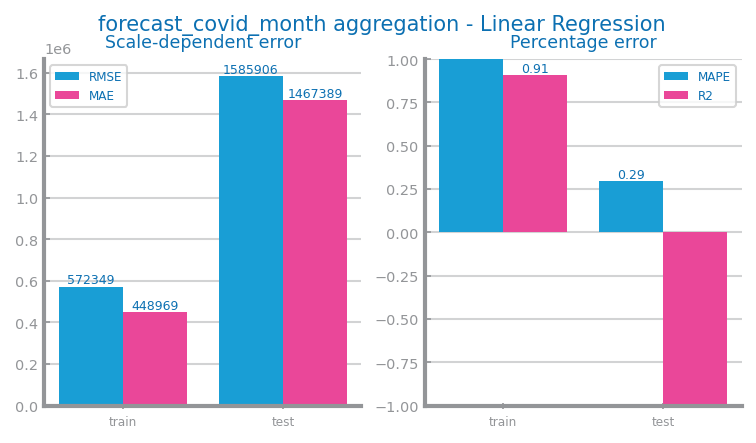

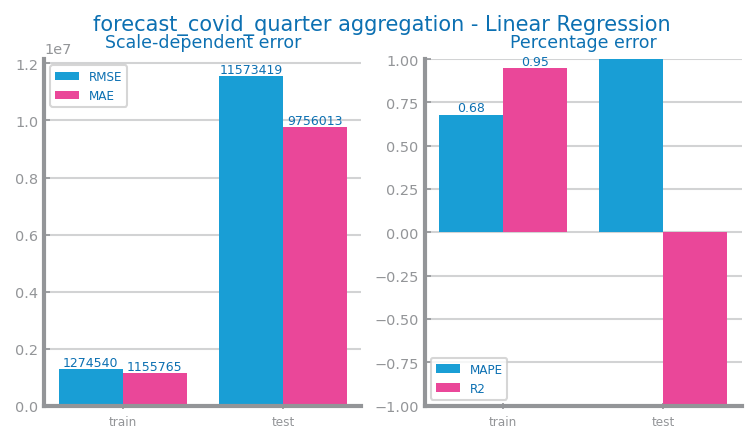

In [67]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} aggregation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_aggregation_linear_regression_eval.png")

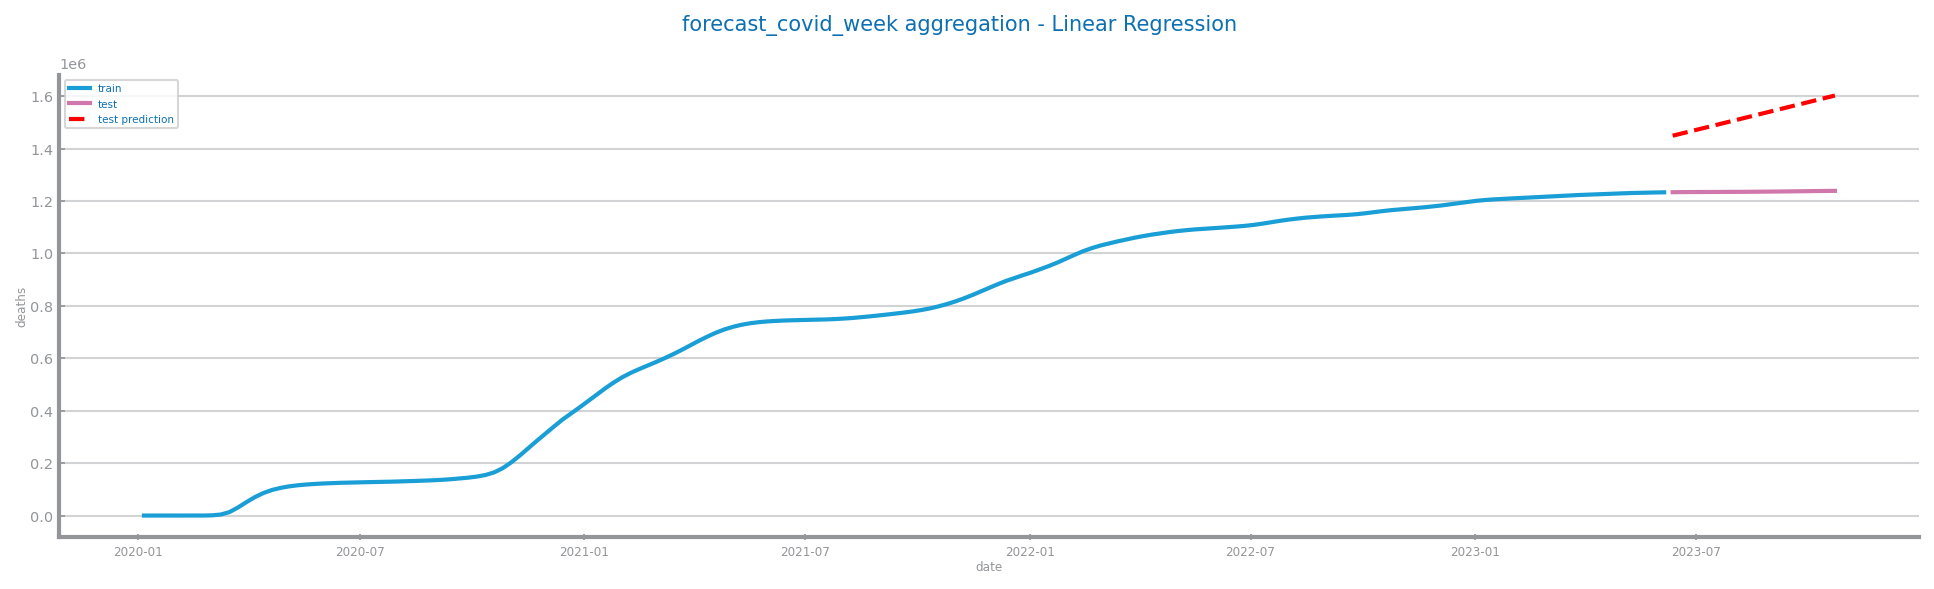

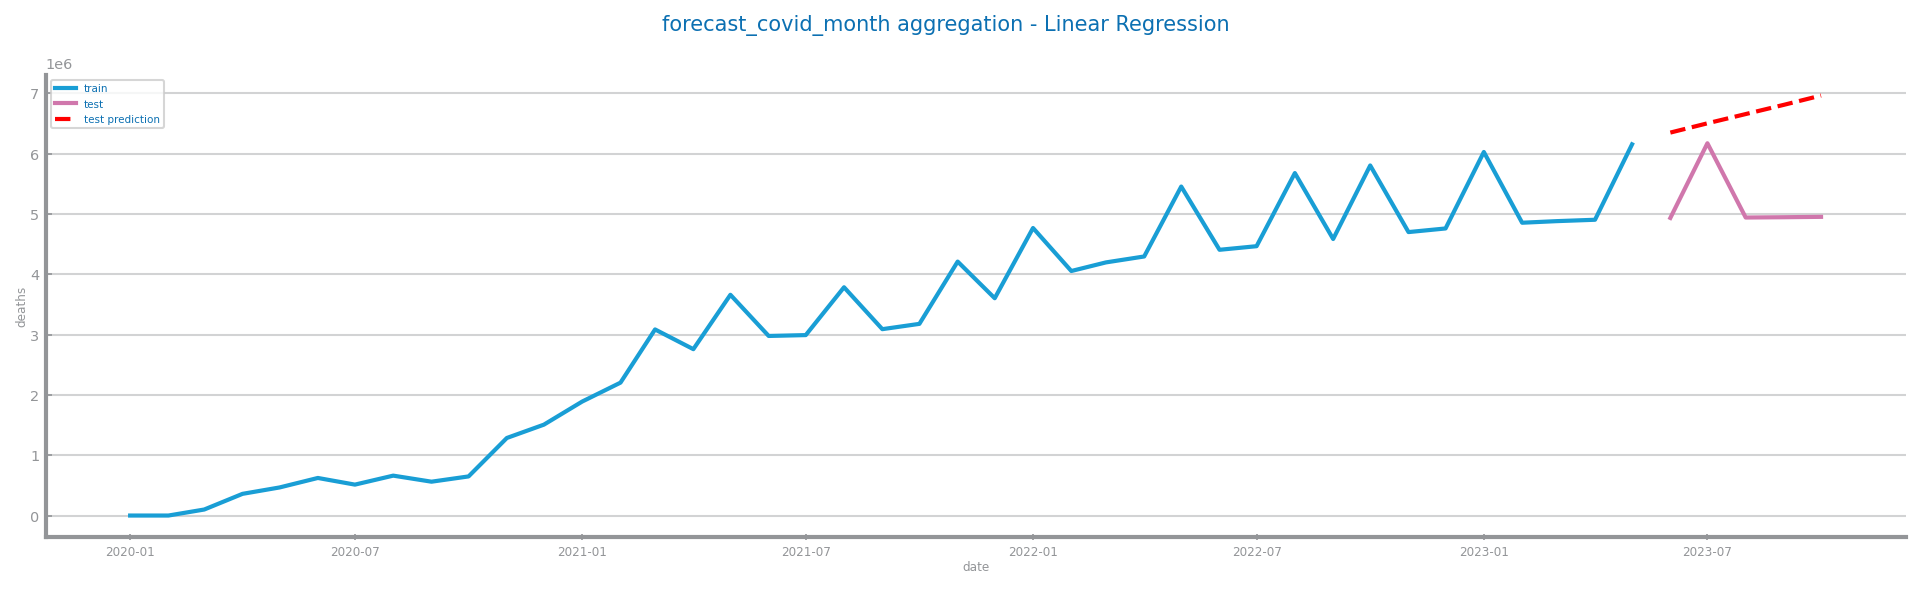

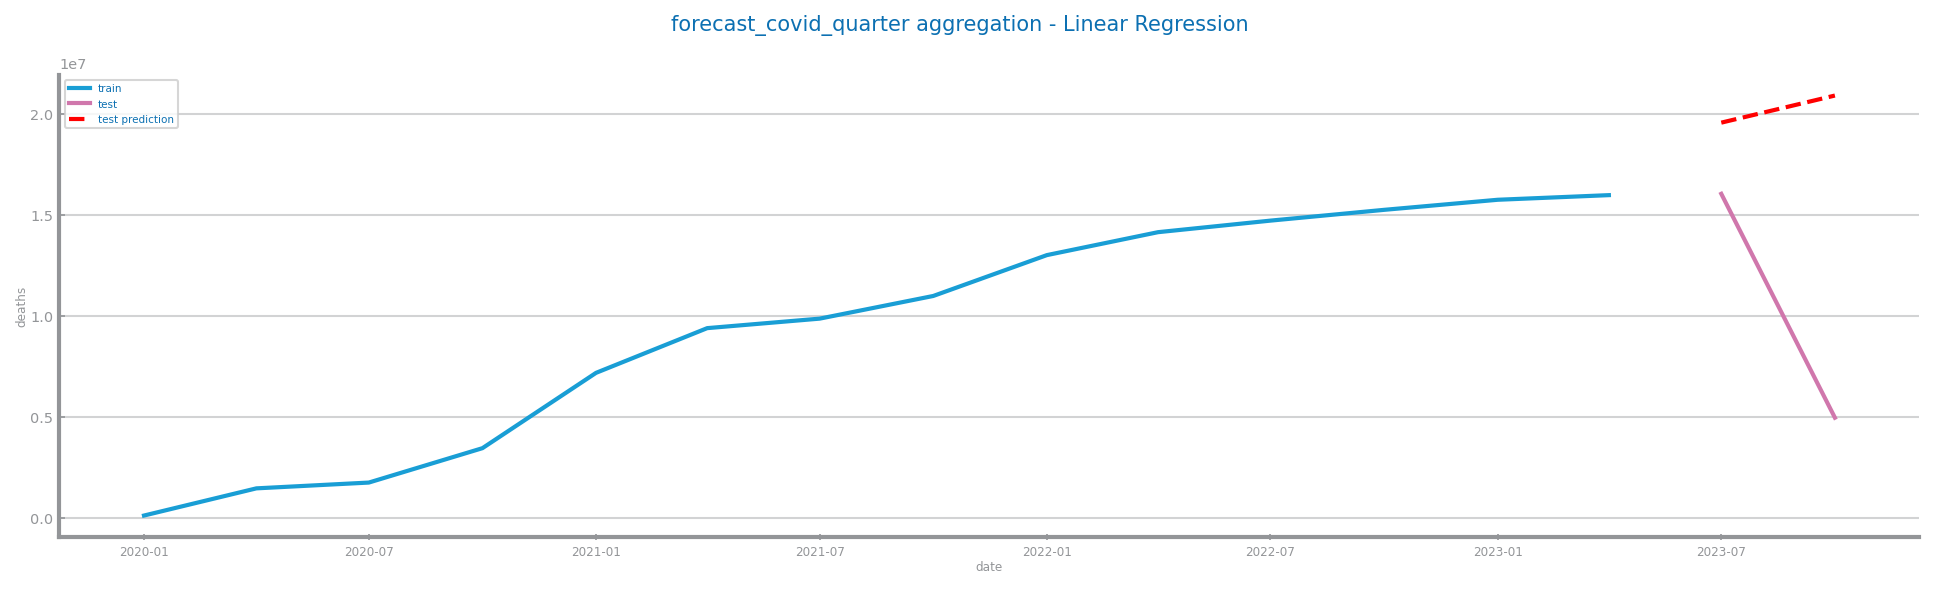

In [68]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} aggregation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_aggregation_linear_regression_forecast.png")

## Selecting Best

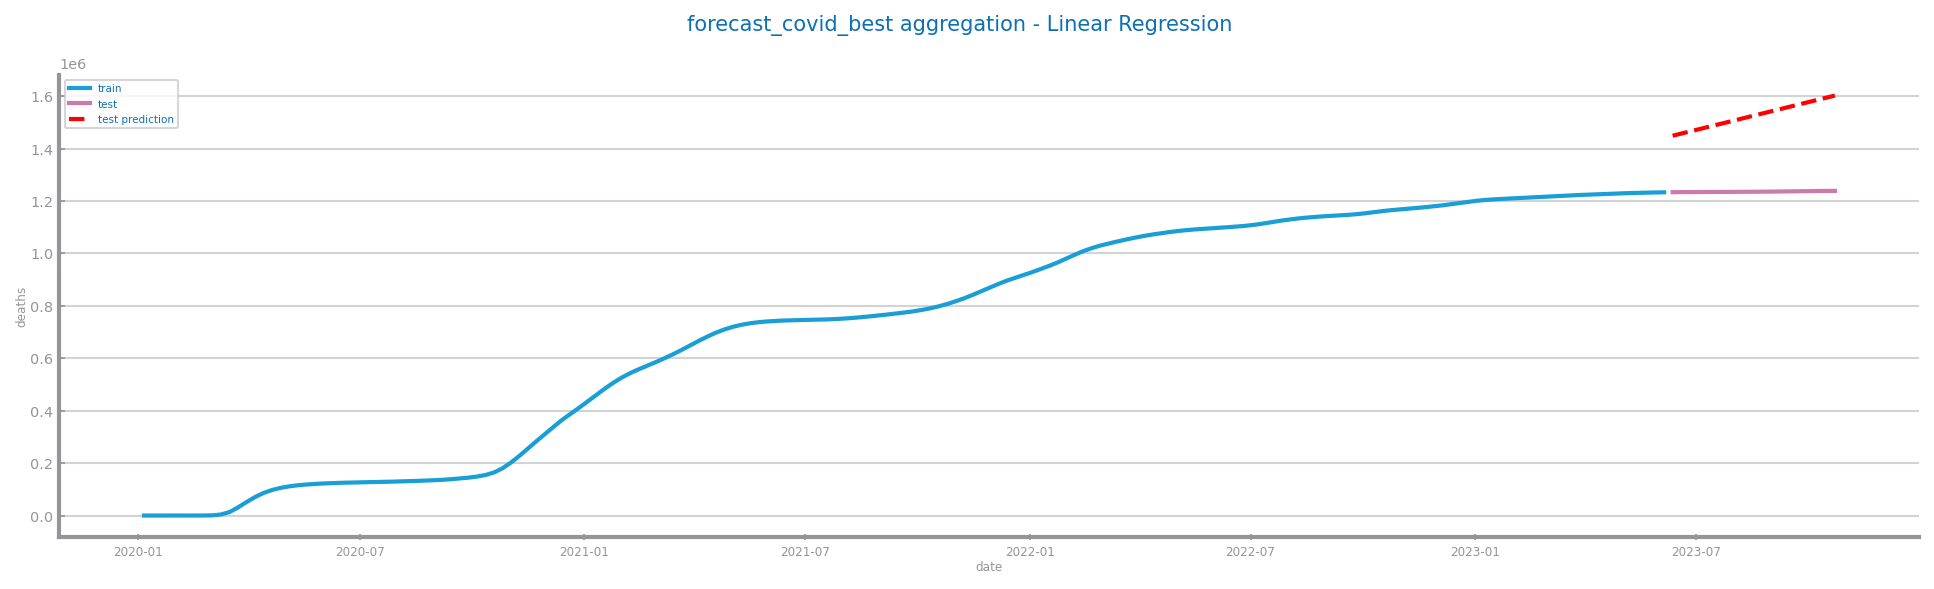

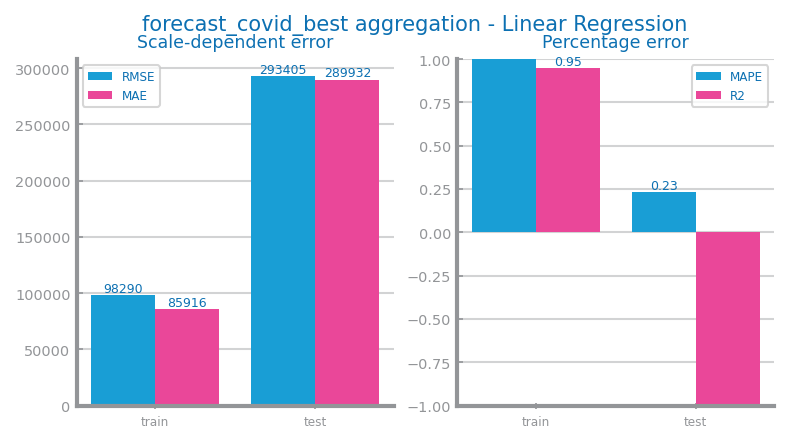

In [69]:
data = ss_agg_w
train, test = series_train_test_split(data, trn_pct=0.90)
trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag}_best aggregation - Linear Regression",
    xlabel=series.index.name,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_best_data_transformation_aggregation_linear_regression_forecast.png")
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_best aggregation - Linear Regression")
savefig(f"images/forecast/{file_tag}_best_data_transformation_aggregation_linear_regression_eval.png")

# Smoothing

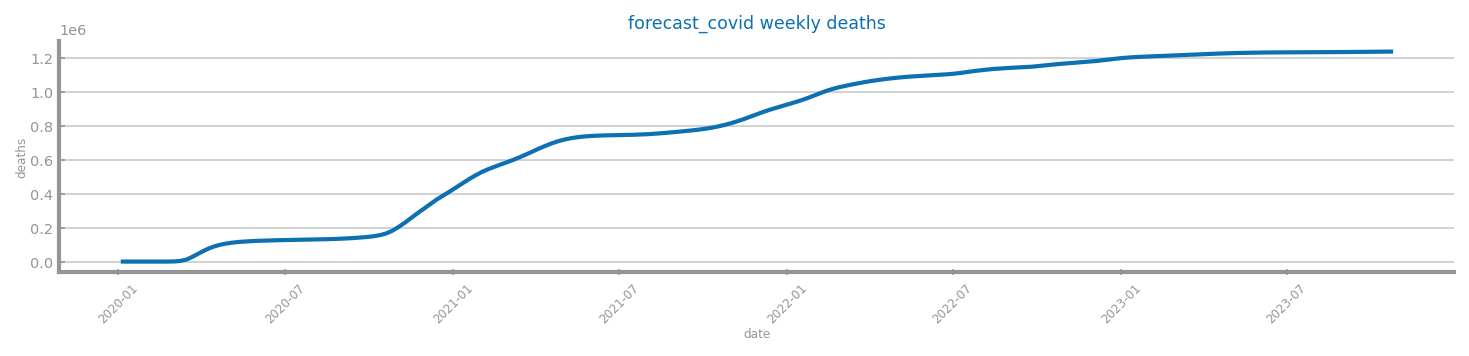

In [70]:
ss_smooth_5 : DataFrame = data.rolling(window=5).mean()
ss_smooth_10 : DataFrame = data.rolling(window=10).mean()
ss_smooth_25 : DataFrame = data.rolling(window=25).mean()
ss_smooth_50 : DataFrame = data.rolling(window=50).mean()
ss_smooth_5 = ss_smooth_5.dropna()
ss_smooth_10 = ss_smooth_10.dropna()
ss_smooth_25 = ss_smooth_25.dropna()
ss_smooth_50 = ss_smooth_50.dropna()
common_index = ss_smooth_5.index.intersection(ss_smooth_50.index)
ss_smooth_5 = ss_smooth_5.loc[common_index]
ss_smooth_10 = ss_smooth_10.loc[common_index]
ss_smooth_25 = ss_smooth_25.loc[common_index]
ss_smooth_50 = ss_smooth_50.loc[common_index]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

datas = [ss_smooth_5,ss_smooth_10,ss_smooth_25,ss_smooth_50]
names = ["5","10","25","50"]
#dont uncomment this, its just an example of the savefig, since the teacher doesn't save the pics this time
#savefig(f"images/forecast/{file_tag}_data_transformation_aggregation_<whatever-you-doing-in-this-step>", bbox_inches="tight")
show()

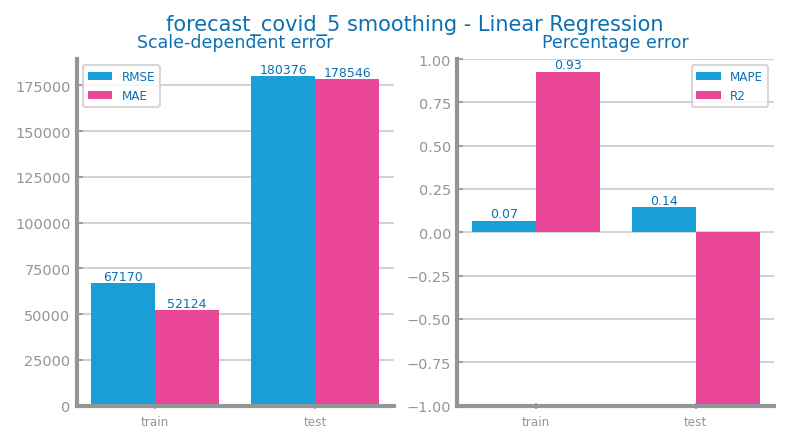

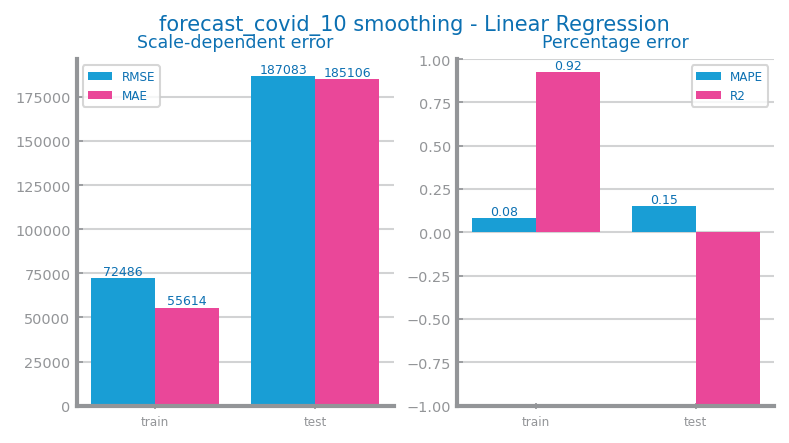

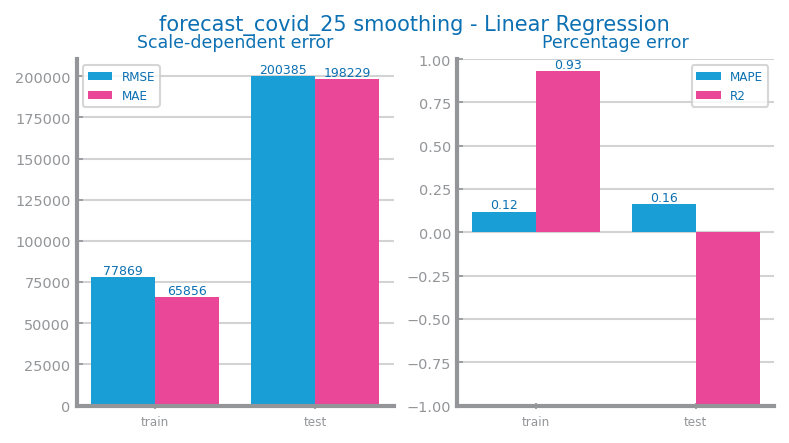

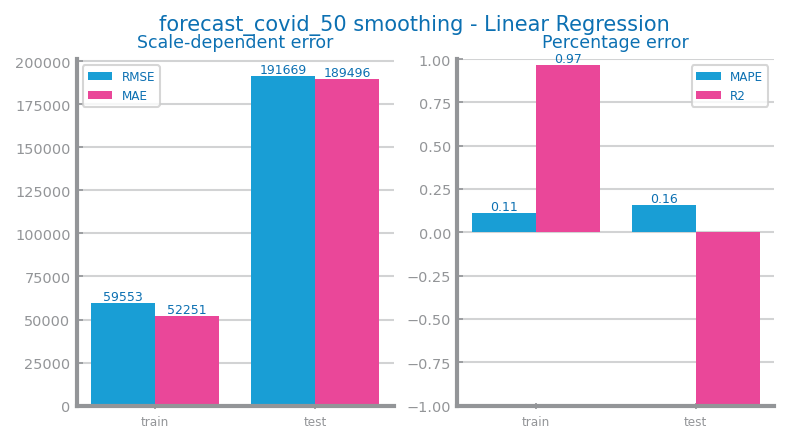

In [71]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} smoothing - Linear Regression")
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_smoothing_linear_regression_eval.png")

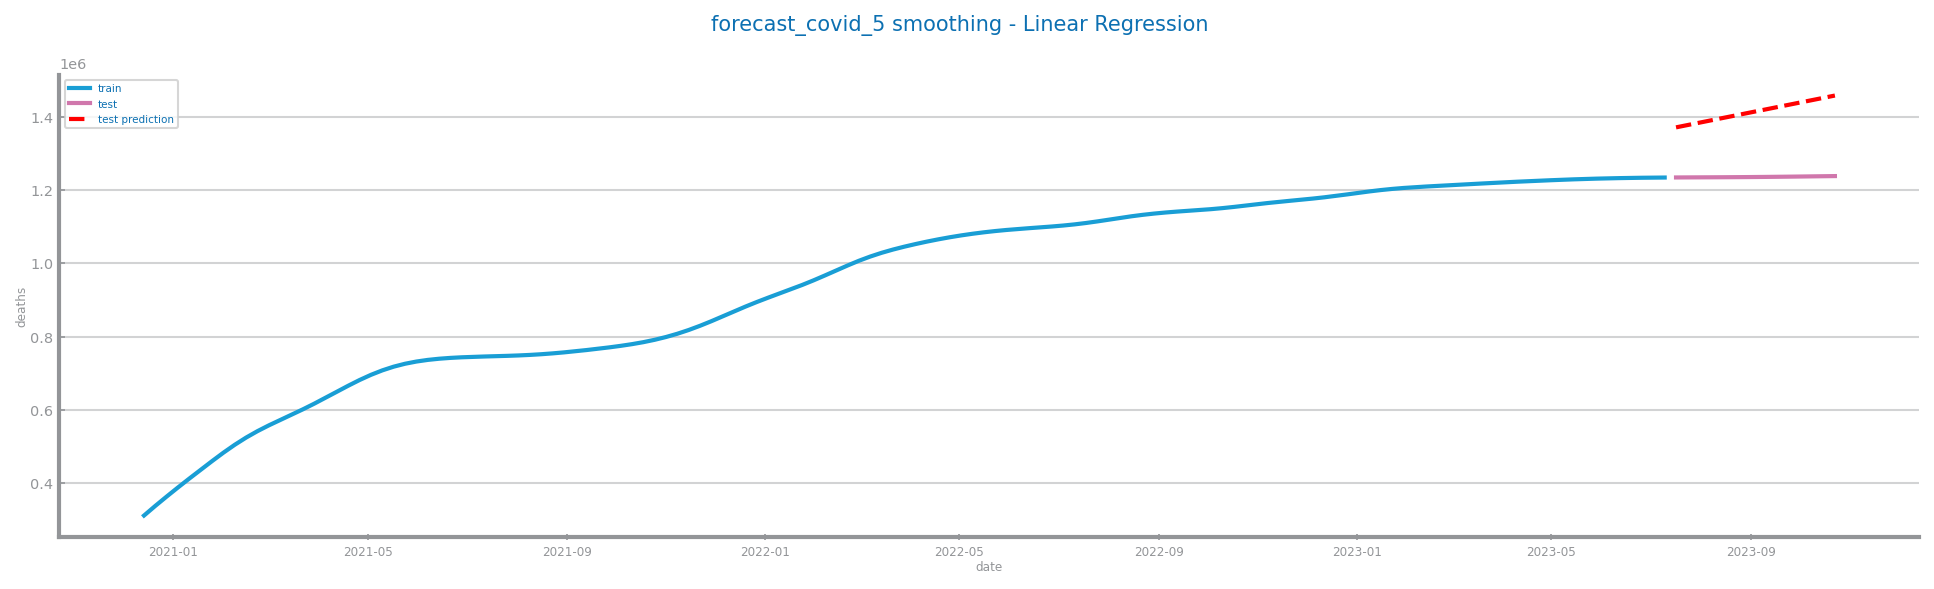

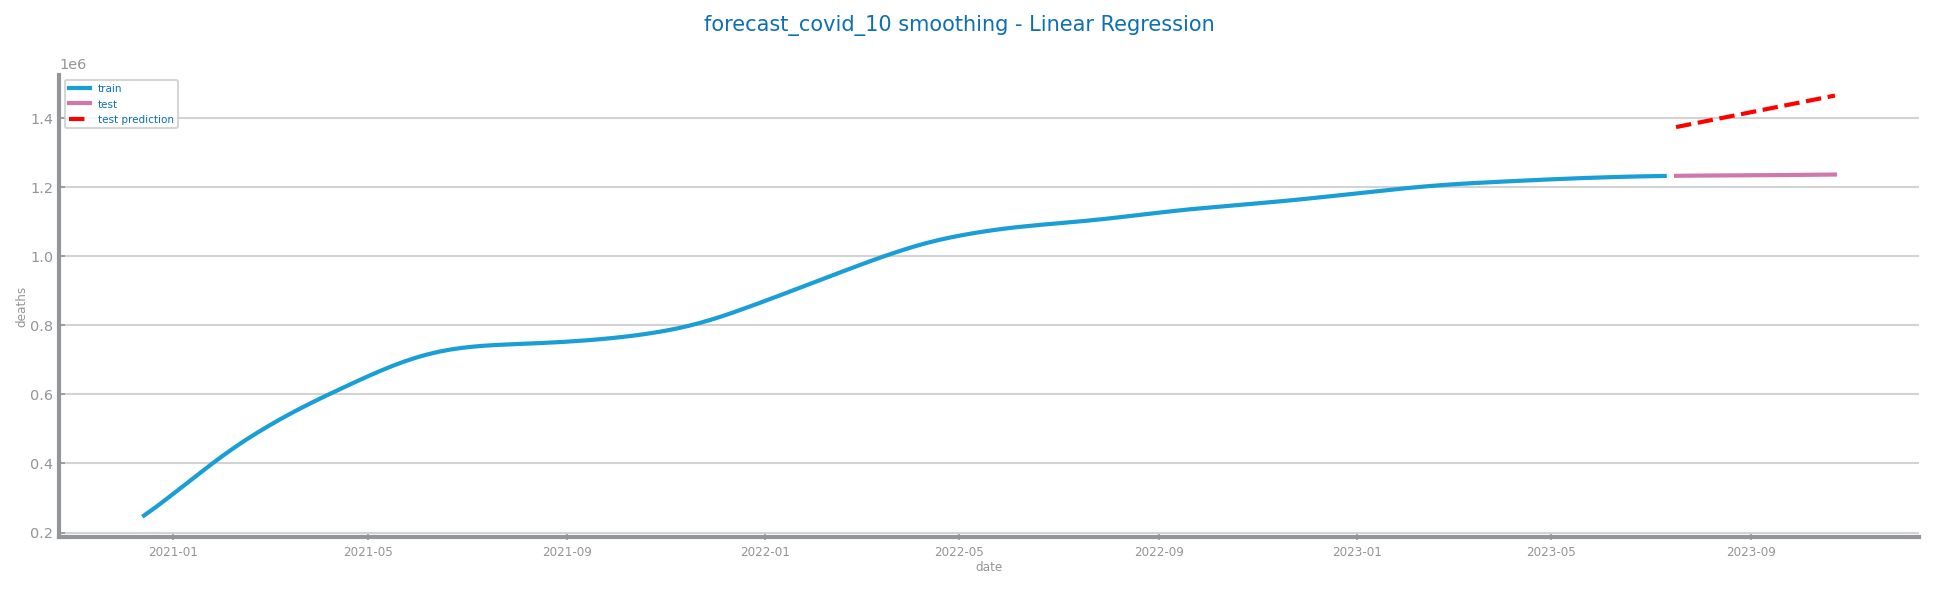

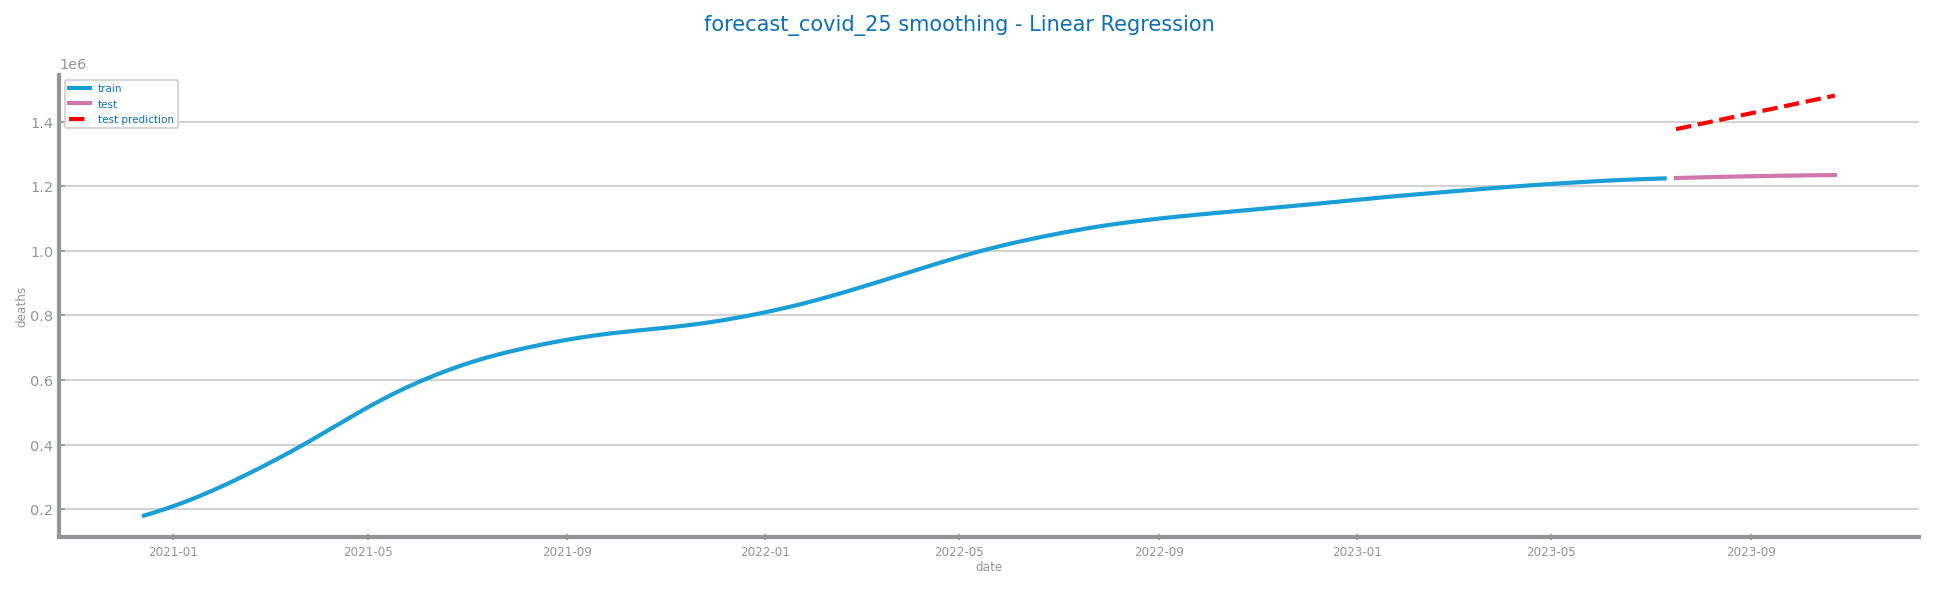

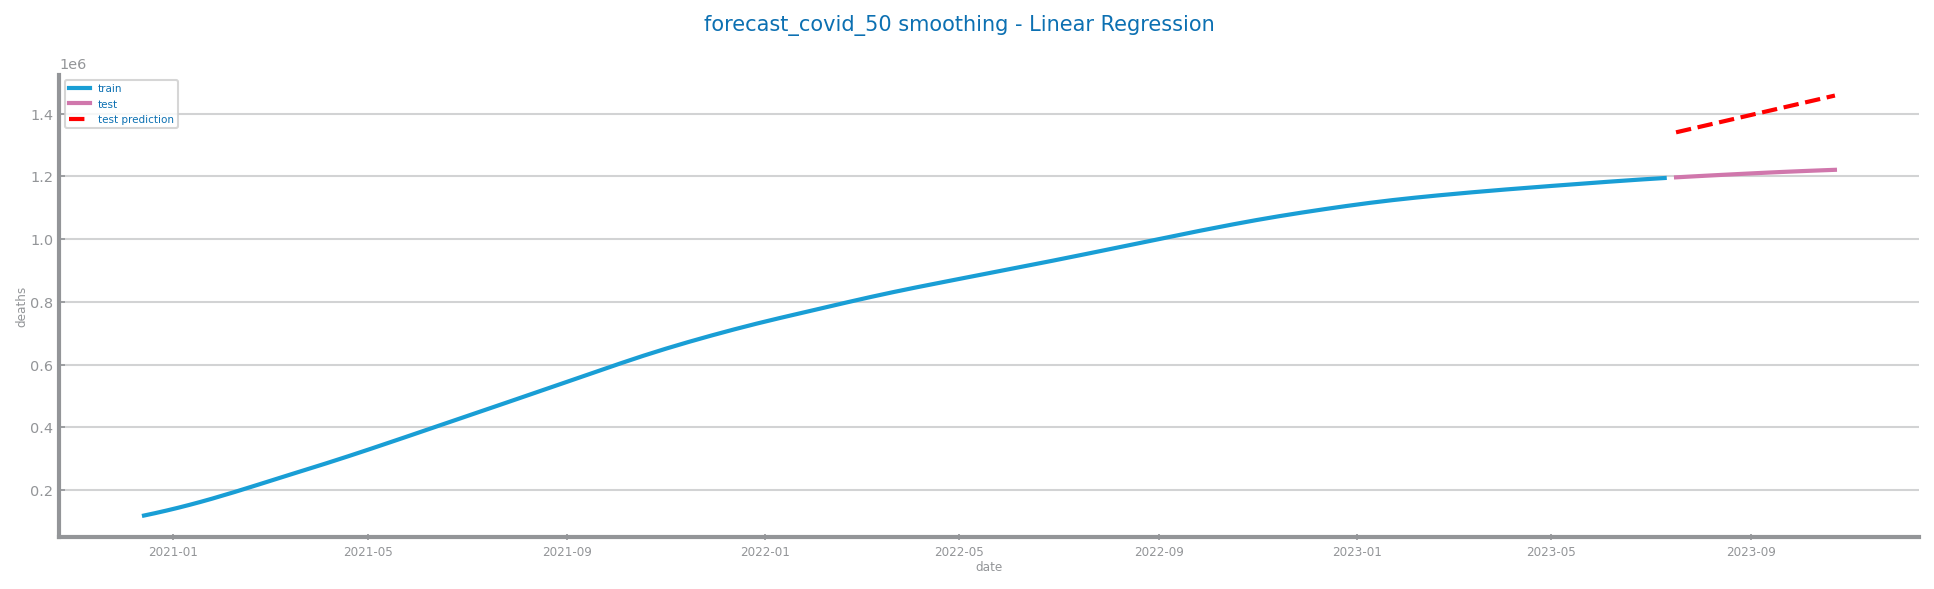

In [72]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} smoothing - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_smoothing_linear_regression_forecast.png")

## Selecting best

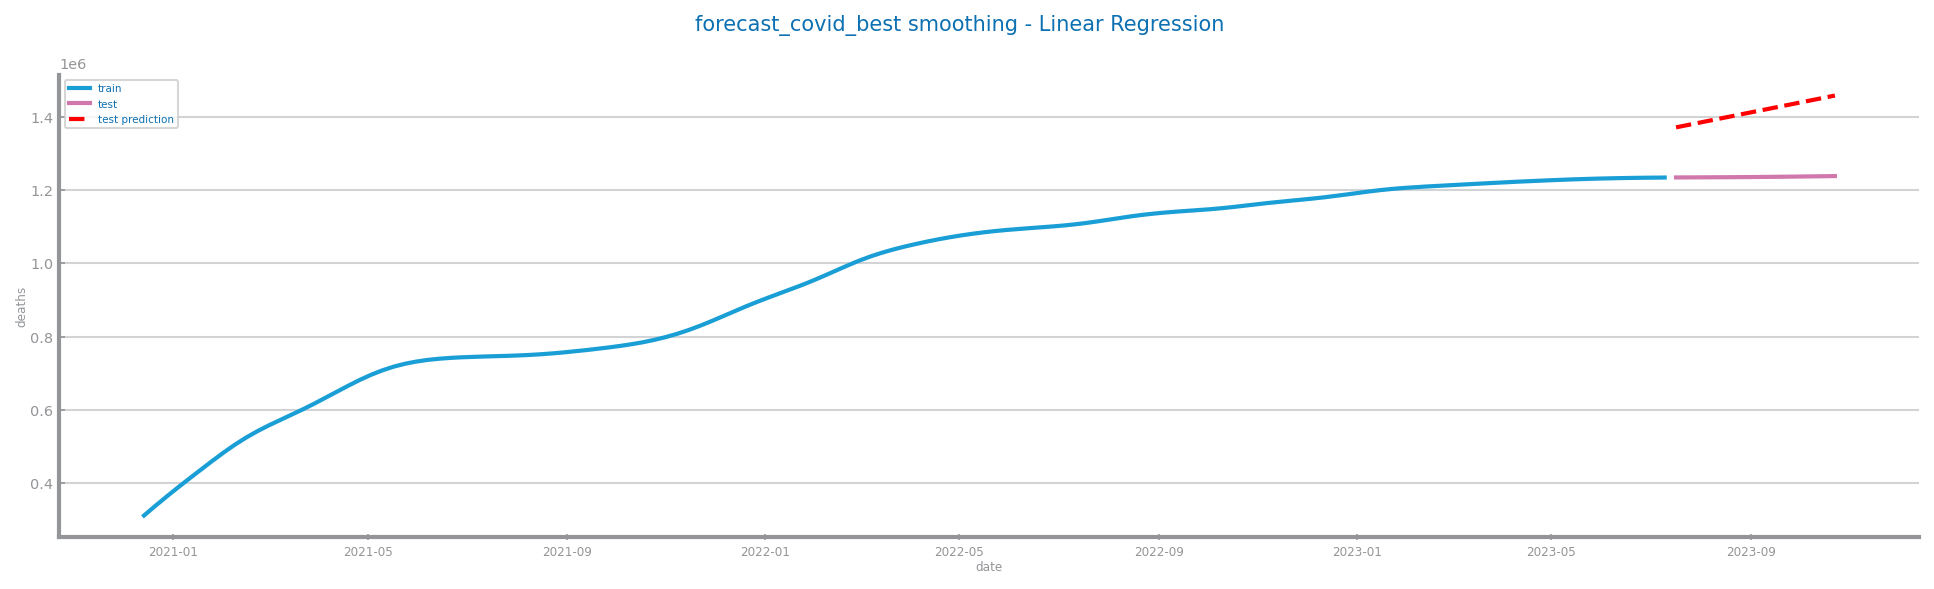

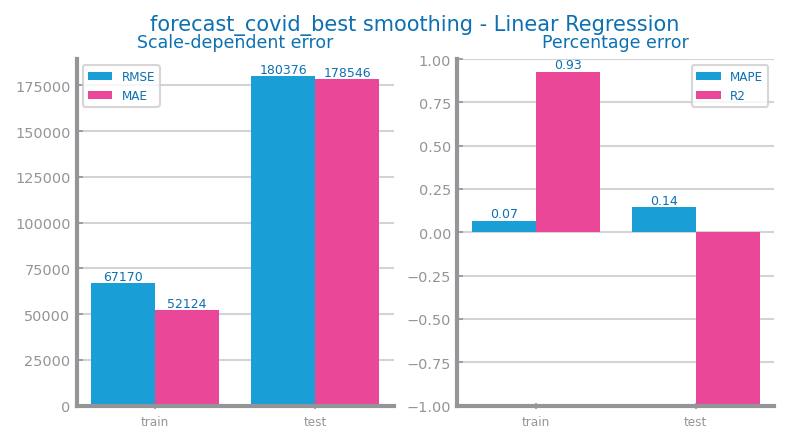

In [73]:
data = ss_smooth_5
train, test = series_train_test_split(data, trn_pct=0.90)
trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag}_best smoothing - Linear Regression",
    xlabel=series.index.name,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_best_data_transformation_smoothing_linear_regression_forecast.png")
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_best smoothing - Linear Regression")
savefig(f"images/forecast/{file_tag}_best_data_transformation_smoothing_linear_regression_eval.png")

# Differentiation

In [74]:
ss_diff_0 : DataFrame = data
ss_diff : DataFrame = data.diff()
ss_diff_2 : DataFrame = ss_diff.diff()
ss_diff = ss_diff.dropna()
ss_diff_2 = ss_diff_2.dropna()
common_index = ss_diff_2.index.intersection(ss_diff_0.index)
ss_diff_0 = ss_diff_0.loc[common_index]
ss_diff = ss_diff.loc[common_index]
datas = [ss_diff_0,ss_diff,ss_diff_2]
names = ["0","1","2"]

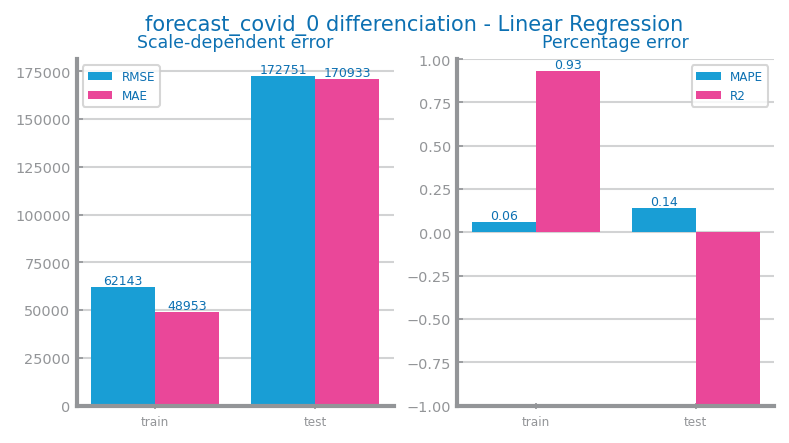

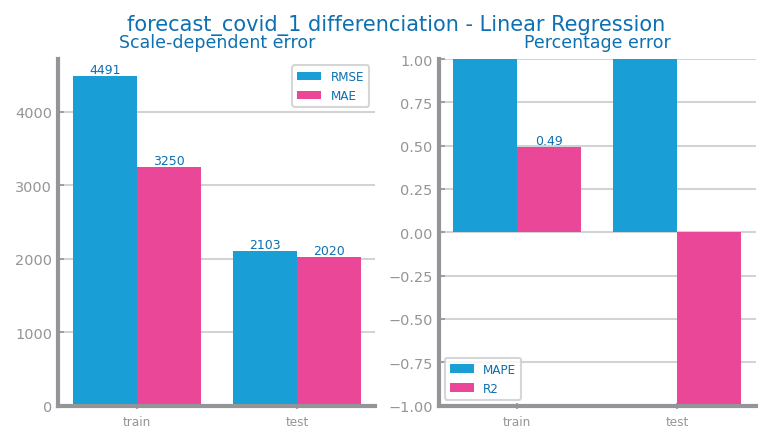

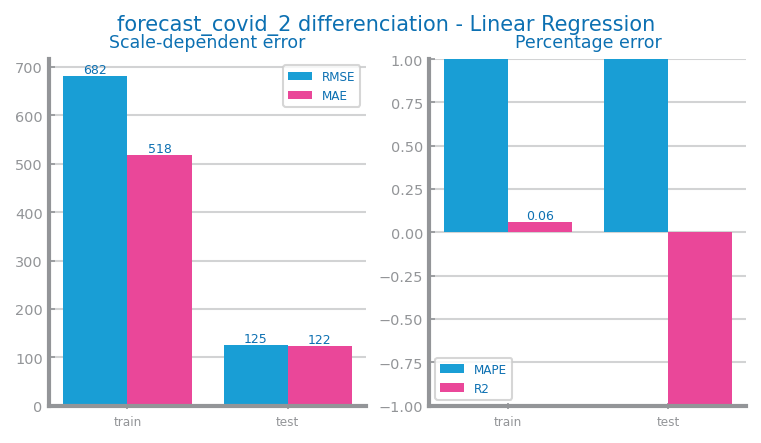

In [75]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} differenciation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_eval.png")

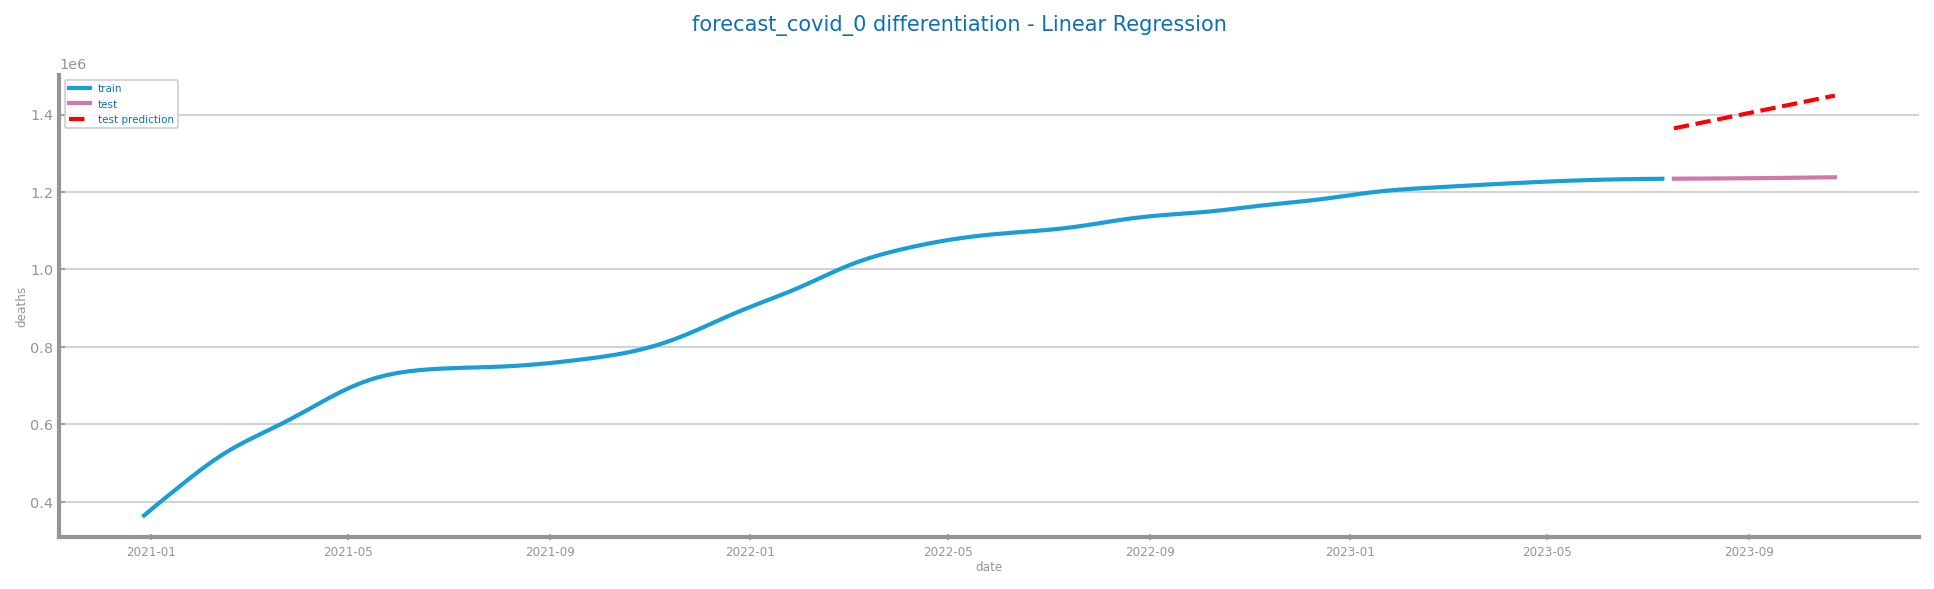

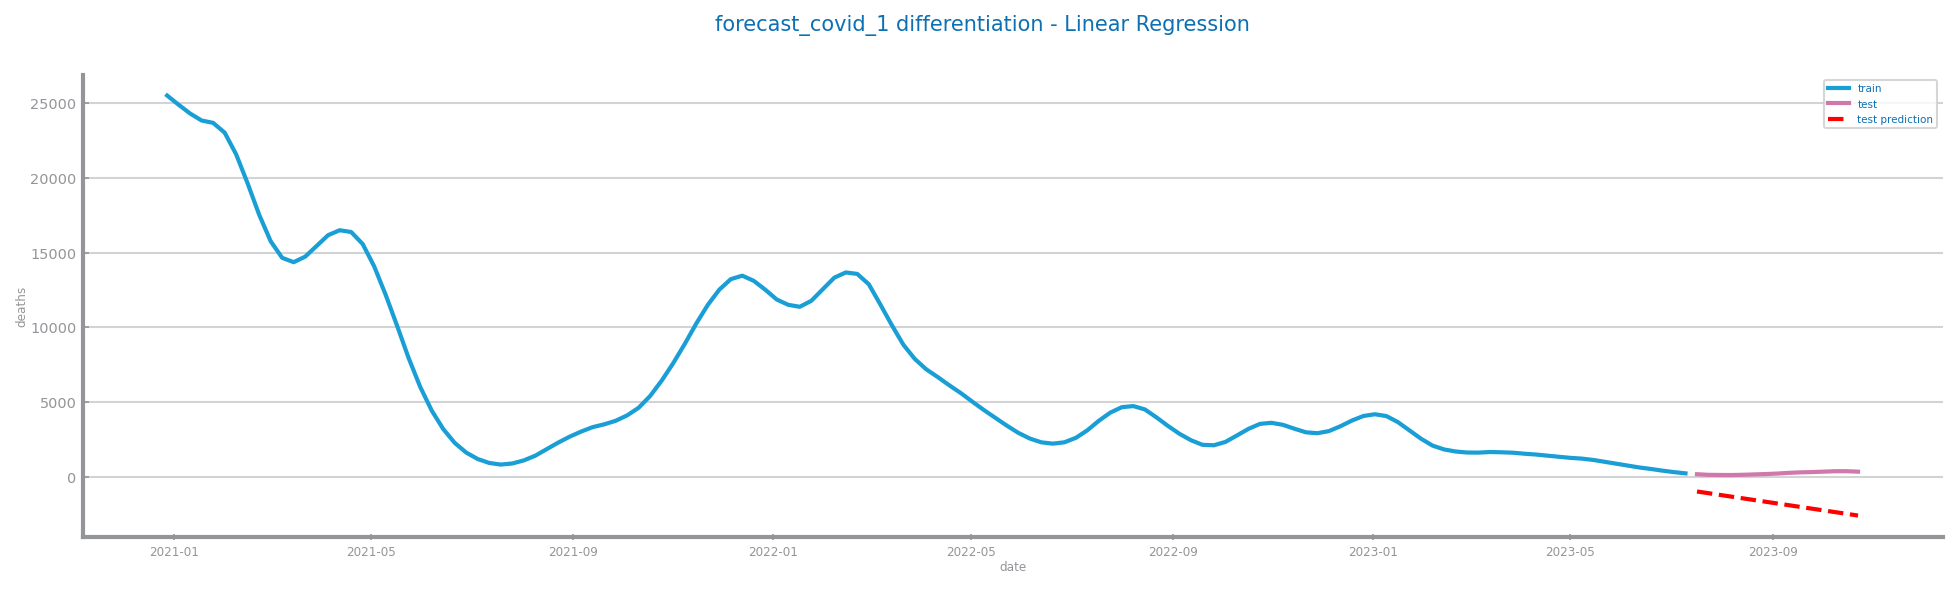

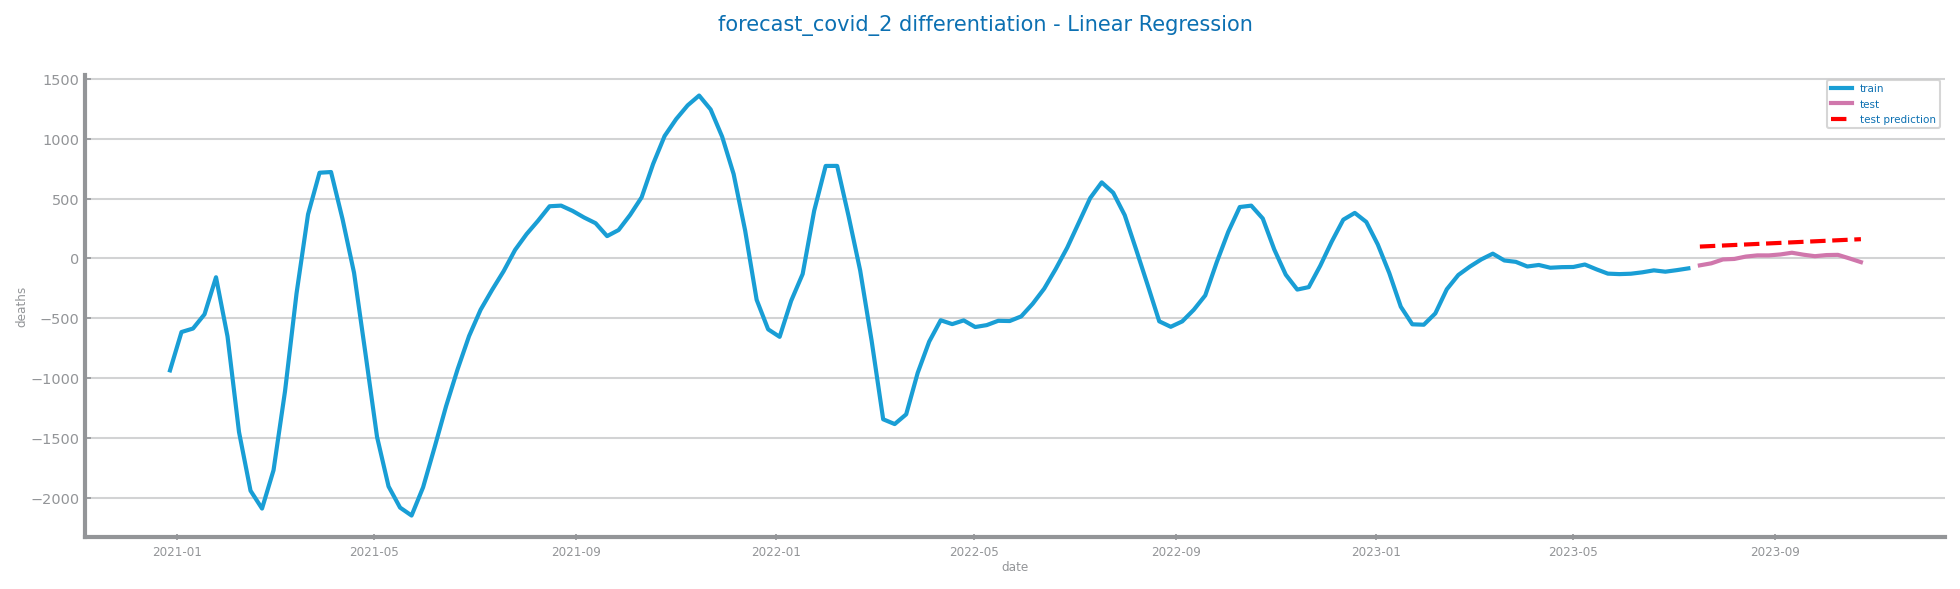

In [76]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} differentiation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_forecast.png")

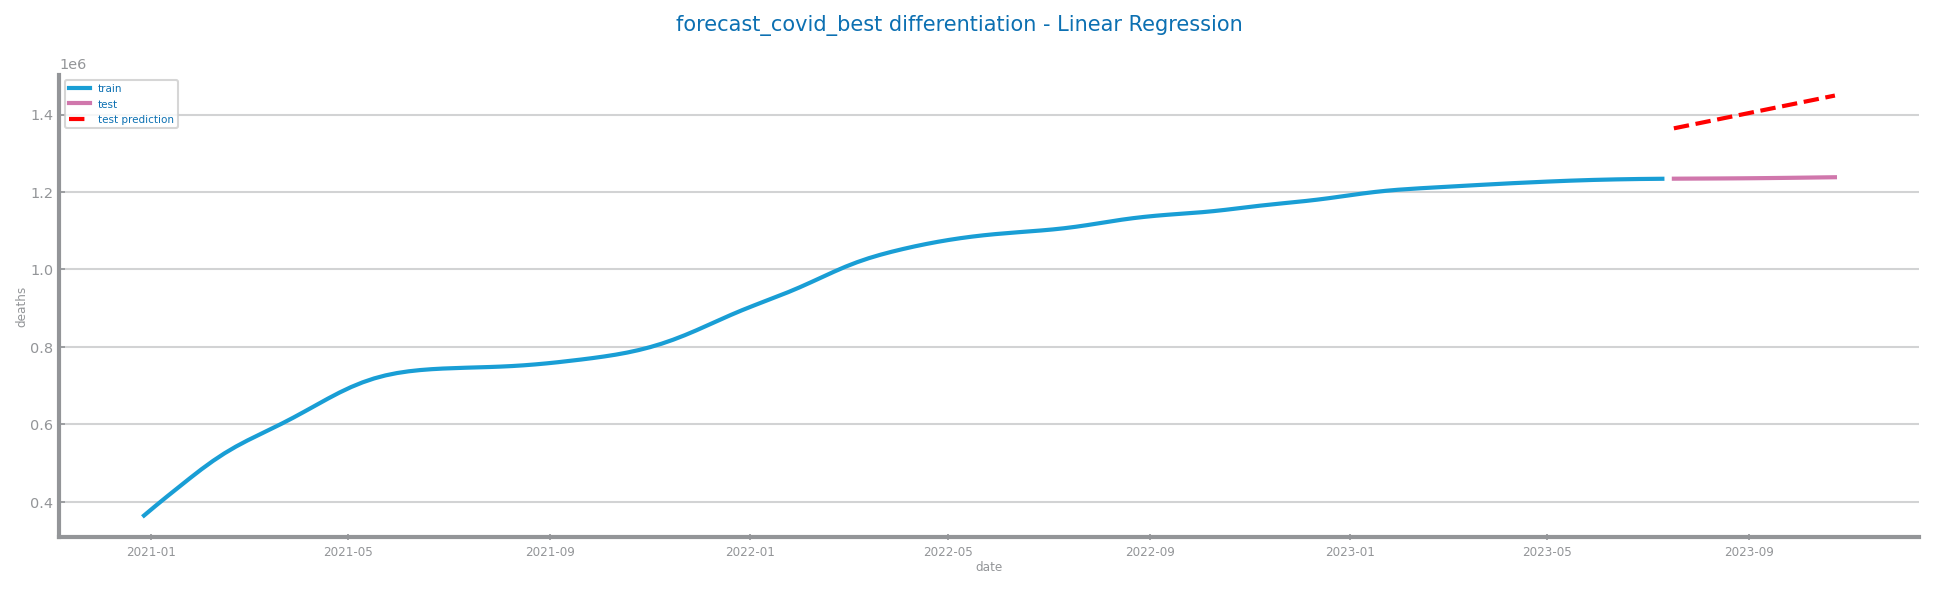

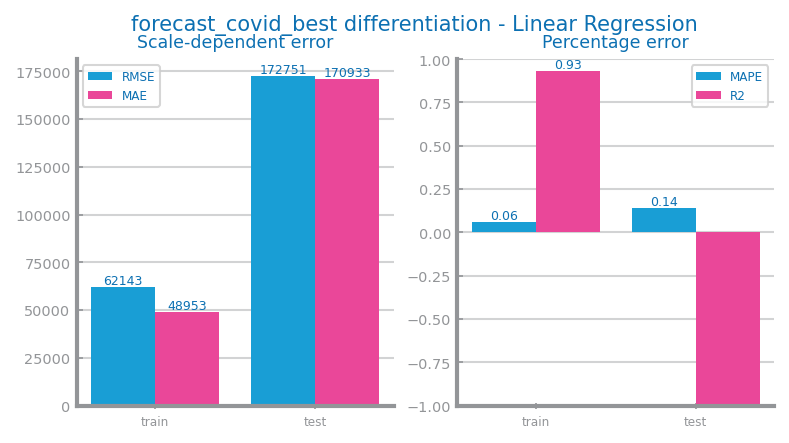

In [77]:
data = ss_diff_0
train, test = series_train_test_split(data, trn_pct=0.90)
trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag}_best differentiation - Linear Regression",
    xlabel=series.index.name,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_best_data_transformation_differentiation_linear_regression_forecast.png")
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_best differentiation - Linear Regression")
savefig(f"images/forecast/{file_tag}_best_data_transformation_differentiation_linear_regression_eval.png")